# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hannah.tudo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

10094

In [8]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)
ethereum_news_en["totalResults"]

4809

In [9]:
# function to create sentiments
def create_sentiments(news):
    sentiments = []
    for article in news["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
        except AttributeError:
            pass
        
        return sentiments

In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = create_sentiments(bitcoin_news_en)
bitcoin_sentiments_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiments_df = bitcoin_sentiments_df[cols]

In [11]:
bitcoin_sentiments_df

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.0,0.964


In [12]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = create_sentiments(ethereum_news_en)
ethereum_sentiments_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_sentiments_df = ethereum_sentiments_df[cols]

In [13]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments_df.describe()

,compound,positive,negative,neutral
count,1.0000,1.000,1.0,1.000
mean,0.0772,0.036,0.0,0.964
std,NaN,NaN,NaN,NaN
min,0.0772,0.036,0.0,0.964
25%,0.0772,0.036,0.0,0.964
50%,0.0772,0.036,0.0,0.964
75%,0.0772,0.036,0.0,0.964
max,0.0772,0.036,0.0,0.964


In [14]:
# Describe the Ethereum Sentiment
ethereum_sentiments_df.describe()

,compound,positive,negative,neutral
count,1.0000,1.000,1.0,1.000
mean,0.6486,0.135,0.0,0.865
std,NaN,NaN,NaN,NaN
min,0.6486,0.135,0.0,0.865
25%,0.6486,0.135,0.0,0.865
50%,0.6486,0.135,0.0,0.865
75%,0.6486,0.135,0.0,0.865
max,0.6486,0.135,0.0,0.865


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score of 0.135

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of 0.6486

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score of 0.135

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Combine all articles in corpus into one large string
df = pd.DataFrame.from_dict(bitcoin_news_en["articles"])
bitcoin_corpus = ' '.join([df['content'][i] for i in range(len(df))])

df = pd.DataFrame.from_dict(ethereum_news_en["articles"])
ethereum_corpus = ' '.join([df['content'][i] for i in range(len(df))])

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'youve','char','ha','gol'}

In [18]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase & Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [19]:
# Create a new tokens column for Bitcoin

bitcoin_tokens = tokenizer(bitcoin_corpus)

In [21]:
# Create a new tokens column for Ethereum
ethereum_tokens = tokenizer(ethereum_corpus)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigram_counts = Counter(ngrams(bitcoin_tokens, n=2))
print(dict(bitcoin_bigram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', 'fl'): 1, ('fl', 'warr

In [24]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram_counts = Counter(ngrams(ethereum_tokens, n=2))
print(dict(ethereum_bigram_counts))

{('meta', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'apologised'): 1, ('apologised', 'user'): 1, ('user', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp', 'bored'): 1, ('bored', 'ape'): 1, ('ape', 'yacht'): 1, ('yacht', 'club'): 2, ('cl

In [25]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(token_count(bitcoin_bigram_counts,20)))

{('reuters', 'bitcoin'): 5, ('world', 'biggest'): 5, ('may', 'reuters'): 4, ('previous', 'closebitcoin'): 4, ('closebitcoin', 'world'): 4, ('biggest', 'bestknown'): 4, ('bestknown', 'cryptocurrency'): 4, ('world', 'largest'): 2, ('losing', 'previous'): 2, ('cryptocurrency', 'year'): 2, ('year', 'low'): 2, ('april', 'reuters'): 2, ('bitcoin', 'dropped'): 2, ('interest', 'rate'): 2, ('central', 'african'): 2, ('bitcoin', 'legal'): 2, ('legal', 'tender'): 2, ('el', 'salvador'): 2, ('even', 'though'): 1, ('though', 'number'): 1}


In [27]:
# Use token_count to get the top 10 words for Ethereum
print(dict(token_count(ethereum_bigram_counts,20)))

{('reuters', 'bitcoin'): 4, ('previous', 'closebitcoin'): 4, ('closebitcoin', 'world'): 4, ('world', 'biggest'): 4, ('biggest', 'bestknown'): 4, ('bestknown', 'cryptocurrency'): 4, ('may', 'reuters'): 3, ('yacht', 'club'): 2, ('april', 'reuters'): 2, ('lite', 'hash'): 2, ('hash', 'rate'): 2, ('graphic', 'card'): 2, ('cryptocurrency', 'year'): 2, ('year', 'low'): 2, ('bitcoin', 'dropped'): 2, ('losing', 'previous'): 2, ('last', 'week'): 2, ('meta', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

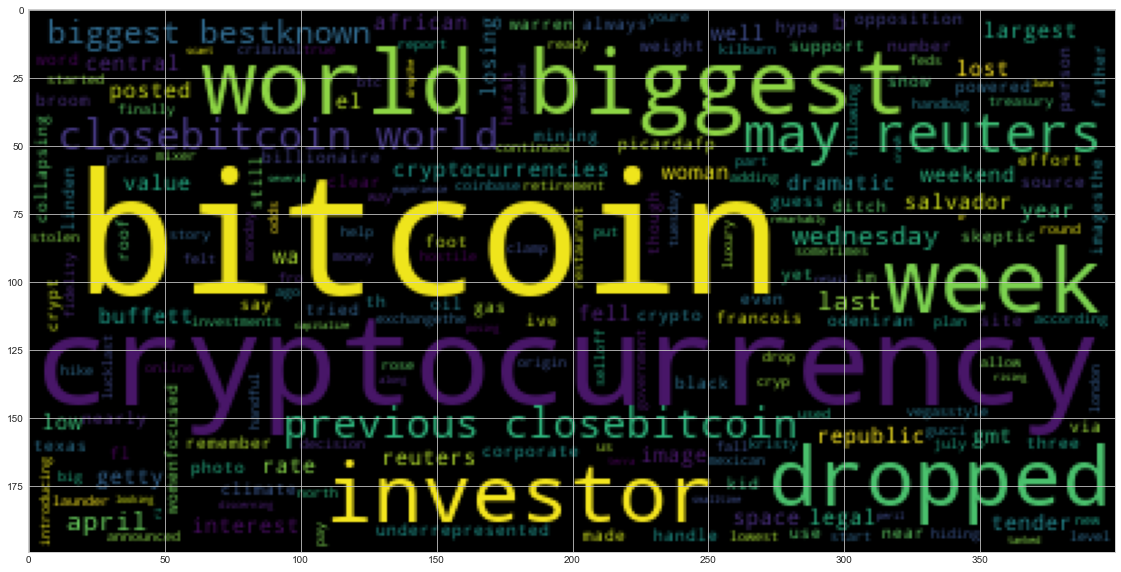

In [29]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(bitcoin_tokens))
plt.imshow(wc)

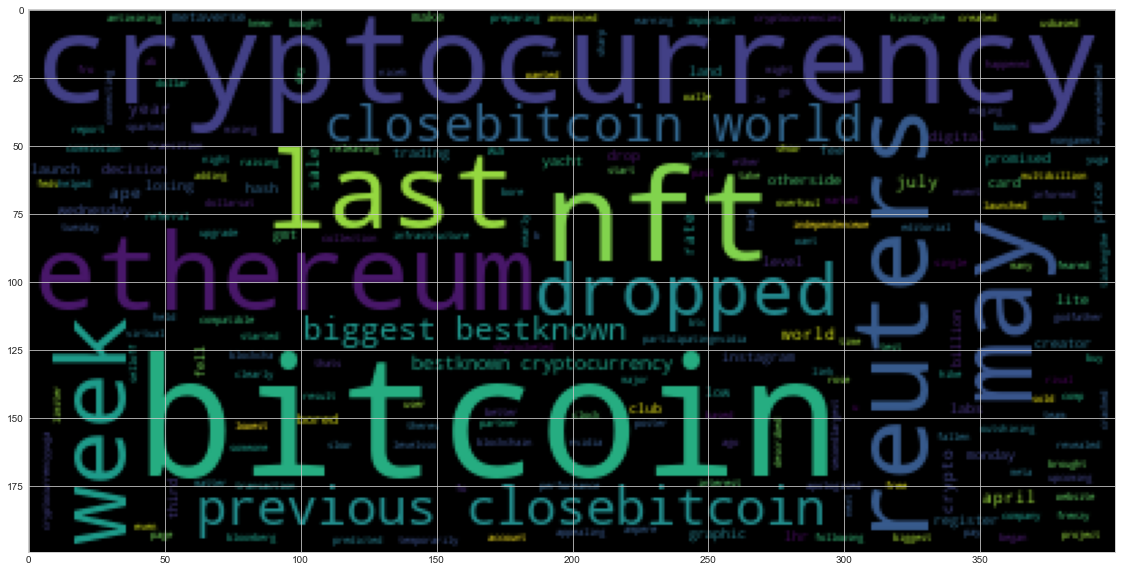

In [30]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ethereum_tokens))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [95]:
# Concatenate all of the Bitcoin text together
bitcoin_corpus

"Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars] A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars] Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars] Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to the Coinbase cryptocurrency exchange.\r\nThe world's largest cryp… [+2164 chars] If youve ever felt like introducing some Vegas-style odds into your retirement plan, youre finally in luck.\r\nLast week, Fidelity

In [33]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_corpus)

# Add a title to the document
# YOUR CODE HERE!
displacy.render(doc, style='ent')

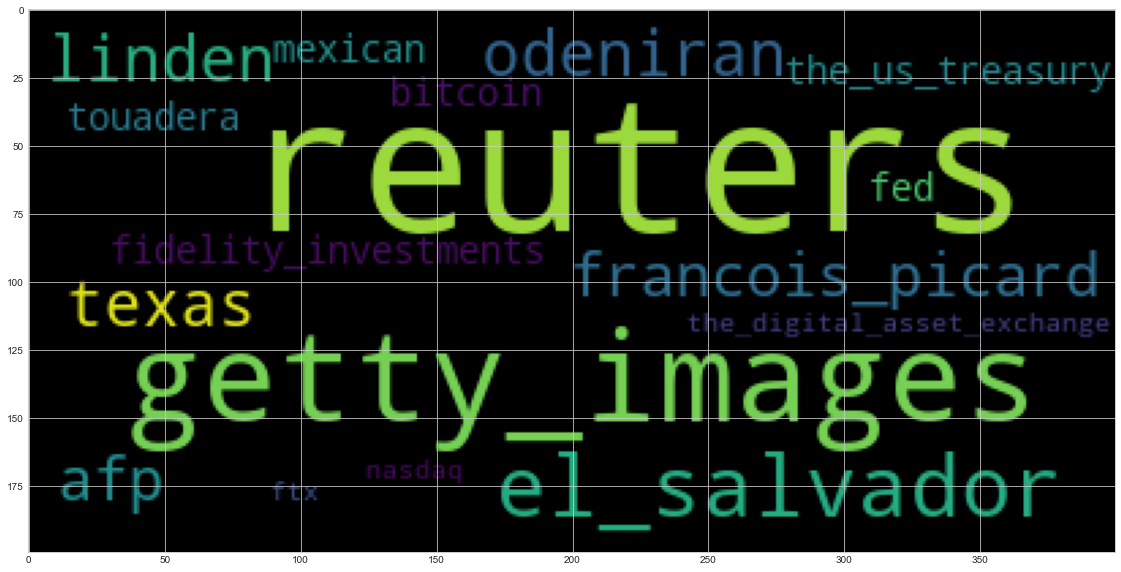

In [34]:
# Render the visualization
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG', 'NORP']]
entities = [i.lower().replace(' ', '_') for i in entities]
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

In [37]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE' or ent.label_ == 'ORG' or ent.label_ == 'NORP'])

['Odeniran', 'Linden', 'Texas', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Getty Images\r\n', '+2164', 'Fidelity Investments', 'the US Treasury', 'Bitcoin', 'Reuters', 'Reuters', 'Reuters', 'Fed', 'Reuters', 'Mexican', 'Reuters', 'El Salvador', 'Touadera', 'the digital asset exchange', 'FTX', 'El Salvador', 'Nasdaq', 'Reuters']


---

### Ethereum NER

In [38]:
# Concatenate all of the Ethereum text together
ethereum_corpus

'Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars] A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars] When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars] April 26 (Reuters) - Ether has promised to do better. It has promised to go to the next level, edging out crypto rivals and even outshining the godfather, bitcoin. But the clock\'s ticking.\r\nThe No.2 … [+4092 chars] Ethereum is preparing for an upgrade thats been described as the single most important event in crypto history.\r\nThe transition wou

In [39]:
# Run the NER processor on all of the text
doc = nlp(ethereum_corpus)

# Add a title to the document
displacy.render(doc, style='ent')


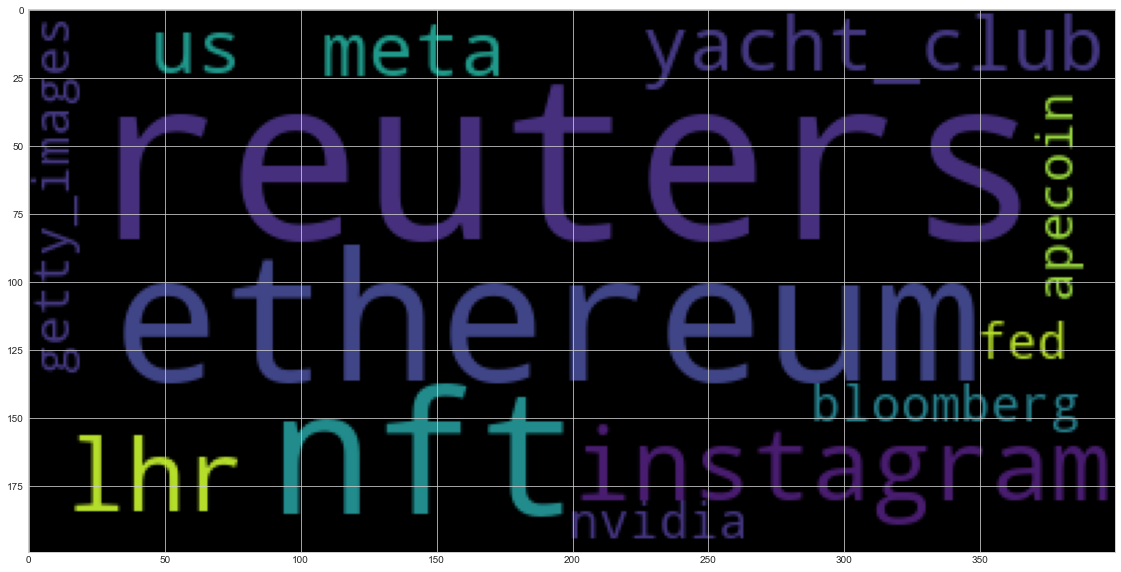

In [40]:
# Render the visualization
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG', 'NORP']]
entities = [i.lower().replace(' ', '_') for i in entities]
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

In [41]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE' or ent.label_ == 'ORG' or ent.label_ == 'NORP'])

['Meta', 'Instagram', 'US', 'Instagram', 'Ethereum', 'Yacht Club', 'NFT', 'Reuters', 'Bloomberg', 'LHR', 'Ethereum', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'NFT', 'Ethereum', 'Nvidia', 'LHR', 'Fed', 'NFT', 'ApeCoin', 'Getty Images\r\n', '+2164']


---